# Data Modeling

## Relational Databases

Benefits of using a relational DB:
- Writing in SQL
- Modeling the data, not queries
- Joining
- Aggregations and analytics
- Secondary indexes available - help with quick searching
- Smaller data volumes
- ACID transactions
- Easier to change to business requirements

When not to use RDBs
- Large amounts of data
- Need fast reads
- Need to store many formats
- Need flexible schema
- Need high availability/distribution (RDBs have a single worker/processor)
- Need horizontal scalability - adding mroe machines/nodes to increase performance

### ACID Transactions

Ensures data integrity

Guarantee validity event when errors or power failures occur!
- Atomicity
  - the whole transaction is processed or nothing at all, i.e. moving money out of checking into savings
- Consistency
  - transactions that follow constraints/rules are written to the DB, otherwise they are not, i.e. not entering ints into a boolean row
- Isolation
  - transactions are processed securely and independently. Order of transactions does not matter
  - Other queries cannot touch data until first is done processing
- Durability
  - completed transactions are saved to DB in case of failure
    - Committed transactions remain committed - effects are recorded in non-volatile storage
    - 

### Playing with PSQL using `psycopg2` lib in Python

In [1]:
import psycopg2
import getpass

In [10]:
user = "postgres"
passwd = getpass.getpass(prompt=f'Enter password for user {user}')
try: 
    conn = psycopg2.connect(f"host=127.0.0.1 dbname=songs user={user} password={passwd}")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

In [11]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)

In [12]:
conn.autocommit = True

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS songs (song_title text, artist_name text, year text, album_name text, single bool);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [13]:
try: 
    cur.execute("INSERT INTO songs \
                 VALUES ('Across the Universe', 'The Beatles', 1970, 'Let It Be', False)")
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO songs \
                  VALUES ('Think For Yourself', 'The Beatles', 1965, 'Rubber Soul', False)")
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

In [14]:
## TO-DO: Finish the SELECT * Statement 
try: 
    cur.execute("SELECT * FROM songs;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Across the Universe', 'The Beatles', '1970', 'Let It Be', False)
('Think For Yourself', 'The Beatles', '1965', 'Rubber Soul', False)


In [15]:
cur.close()
conn.close()

## NoSQL/NonRelational Databases

MongoDB does support ACID transactions as of v4.2. Otherwise, don't use these if you want ACID transactions, ability to JOIN across tables, or when your dataset is small.

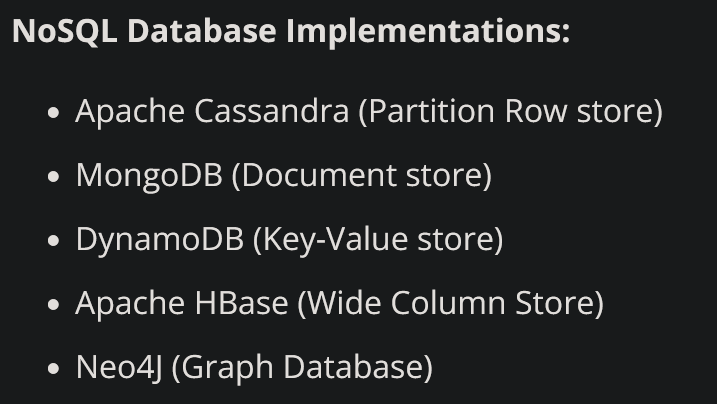

### Apache Cassandra

Partition Row store. See pics below

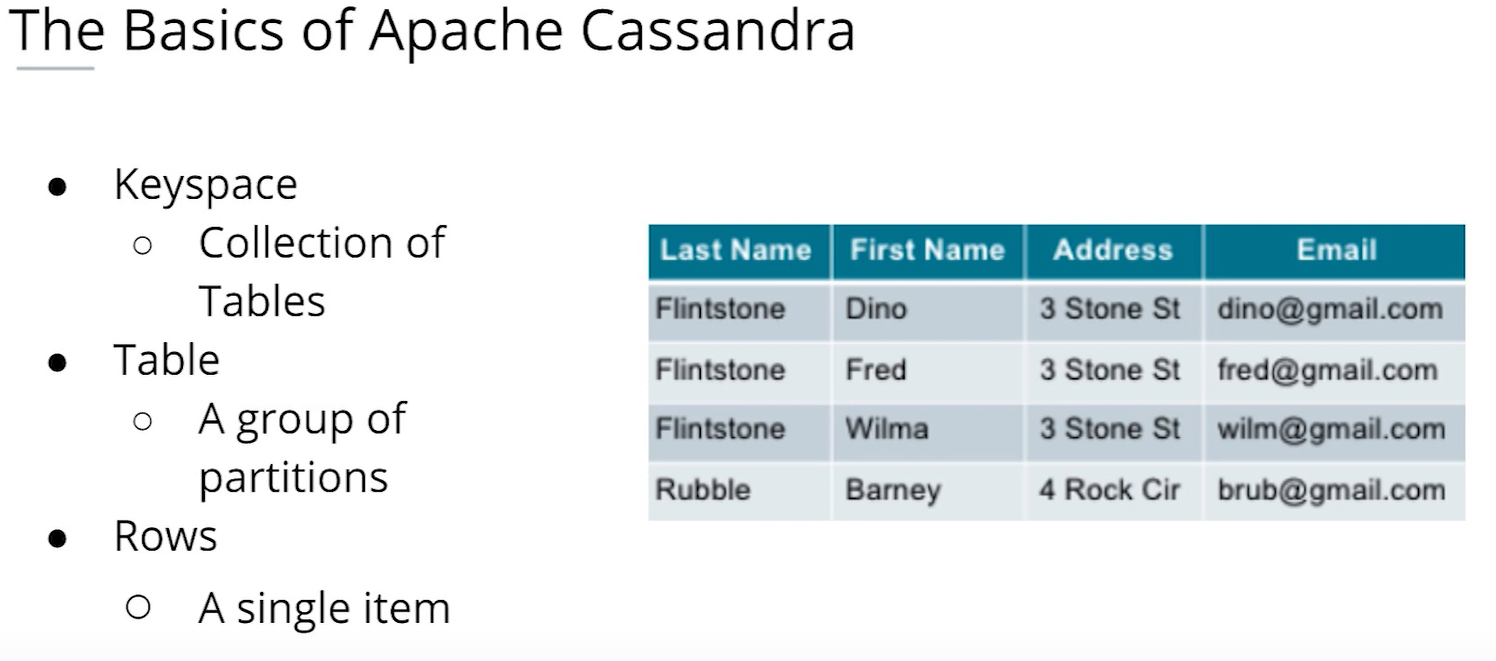

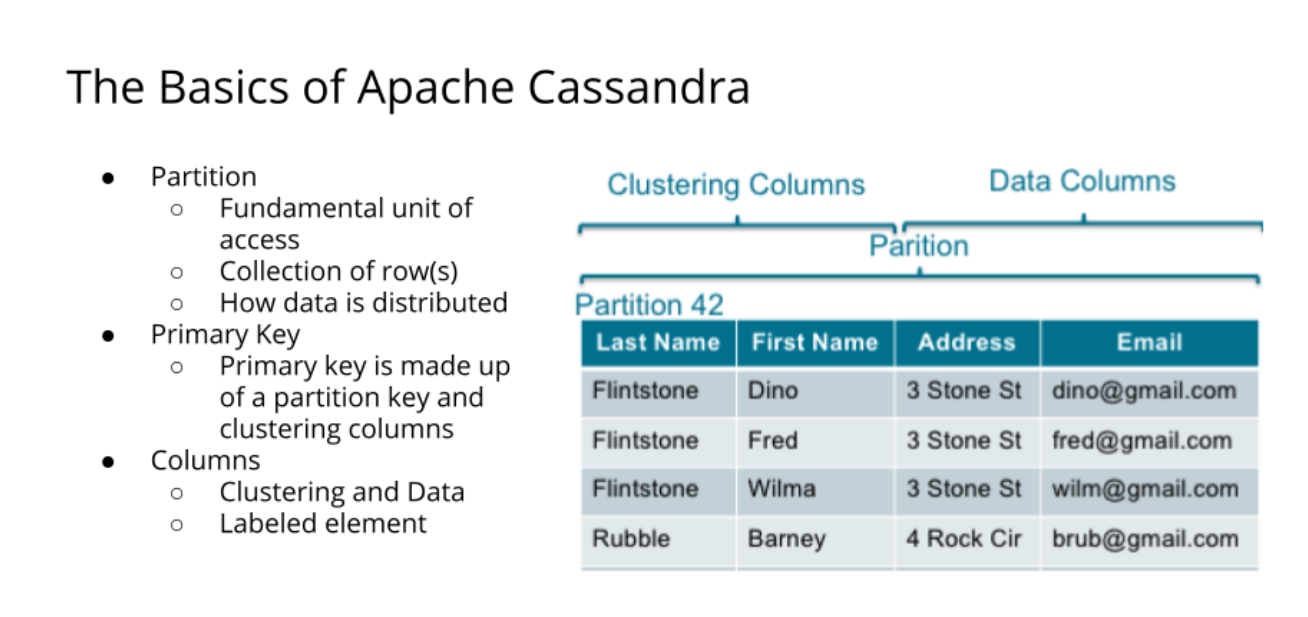

#### But what is it?

- Scalability, high availability, fault tolerance, etc. 
- Uses Cassandra Query Lang
- Great for:
    - Transaction logging
    - IoT
    - Time series data
    - Any workload w/ heavy writes to DB


#### Creating a table with Cassandra